In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import numpy as np

Text(0, 0.5, 'X2')

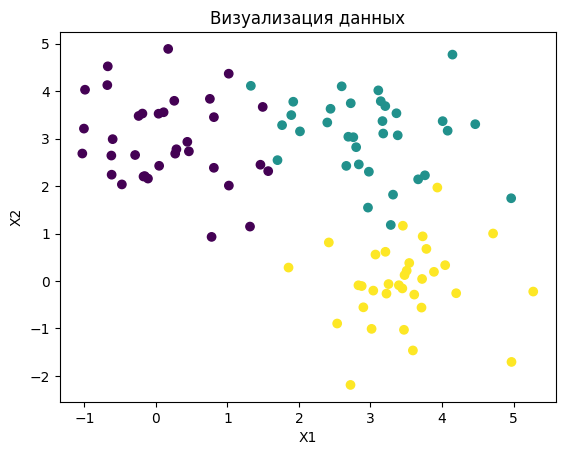

In [4]:
X, y = make_blobs(n_samples=100, centers=[(0,3),(3,3),(3,0)],
                                      n_features=2, random_state=1,
                                      cluster_std=(0.9,0.9,0.9))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Визуализация данных')
plt.xlabel('X1')
plt.ylabel('X2')

In [5]:
depth=4
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth,
                                  random_state=1)
clf_tree.fit(X, y)


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)

# 1. Загрузите встроенные данные sklearn.datasets.load_iris, взяв только последние два столбца (длина и ширина лепестков). Изобразите их на диаграмме рассеяния, подкрасив каждый класс некоторым цветом.

Text(0, 0.5, 'X2')

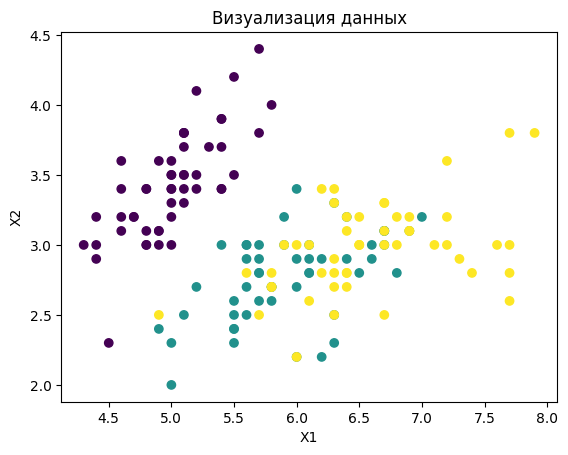

In [6]:
from sklearn.datasets import load_iris

data = load_iris()
x = data.data[:,:2]
y = data.target


plt.scatter(x[:, 0], x[:, 1], c = y)
plt.title('Визуализация данных')
plt.xlabel('X1')
plt.ylabel('X2')

# 2. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева принятия решений.

In [7]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4,
                                  random_state=1)
clf_tree.fit(x, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)

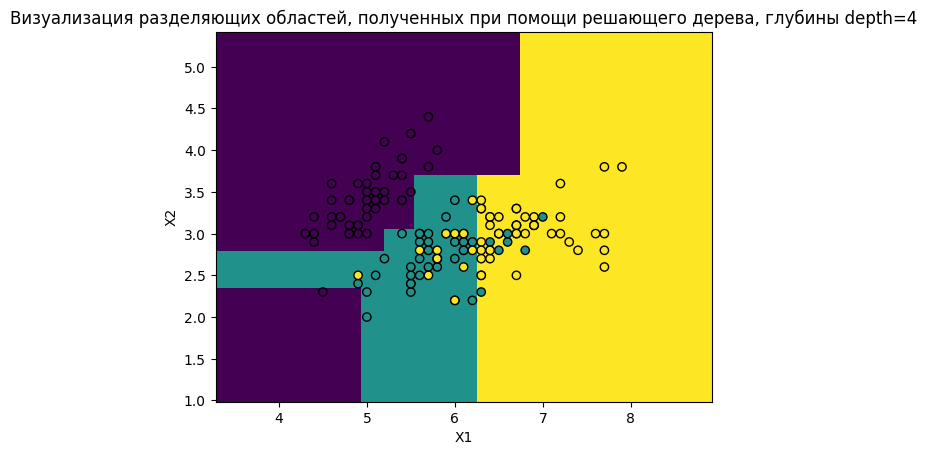

In [8]:
X0 = np.linspace(x[:, 0].min()-1,x[:, 0].max()+1, x.shape[0])
X1 = np.linspace(x[:, 1].min()-1,x[:, 1].max()+1, x.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_tree.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(x[:, 0], x[:, 1], c=y,  edgecolors='black',linewidth=1)

plt.title(f'Визуализация разделяющих областей, полученных при помощи решающего дерева, глубины depth={depth}')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


# 3. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier с разными глубинами (1, 2, 3, 4, 10), используя энтропию, и визуализируйте в каждом случае полученные разделяющие области.

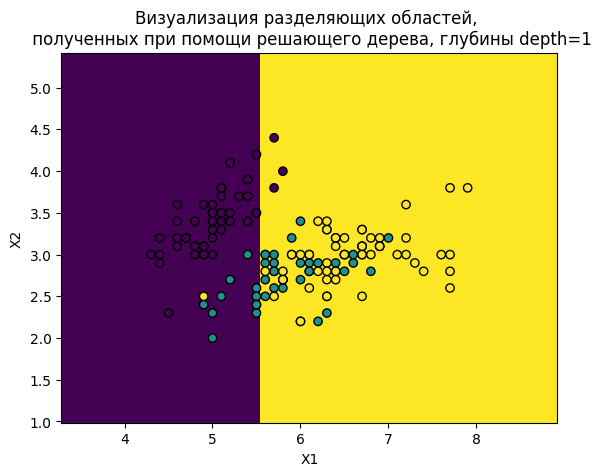

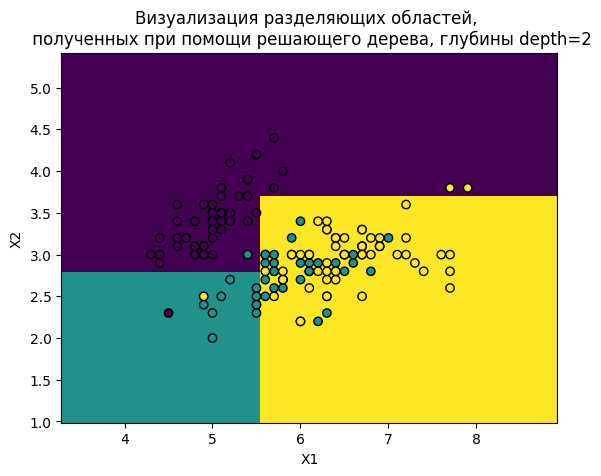

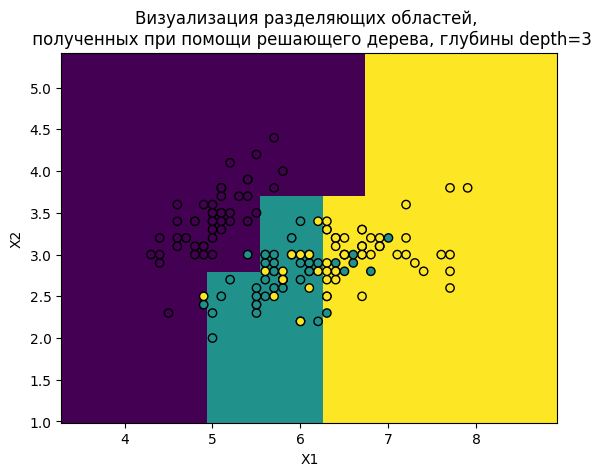

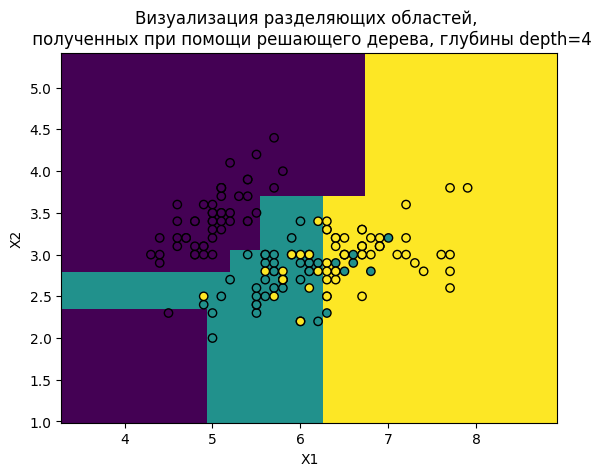

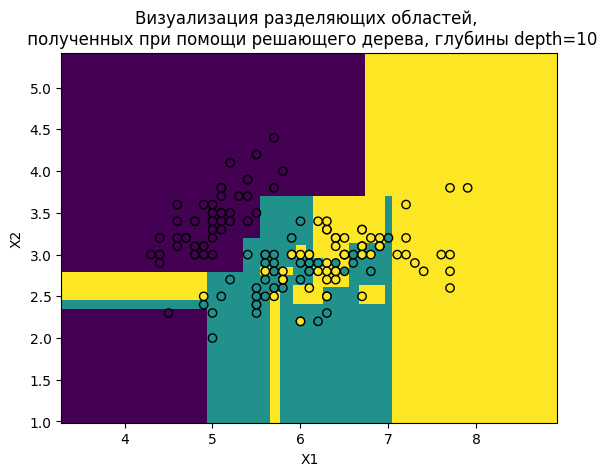

In [9]:
depthes = [1, 2, 3, 4, 10]
for i in depthes:
  clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=i,
                                  random_state=1)
  clf_tree.fit(x, y)
  X0 = np.linspace(x[:, 0].min()-1,x[:, 0].max()+1, x.shape[0])
  X1 = np.linspace(x[:, 1].min()-1,x[:, 1].max()+1, x.shape[0])
  X0_grid, X1_grid = np.meshgrid(X0, X1)

  y_predict = clf_tree.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
  plt.pcolormesh(X0_grid, X1_grid, y_predict)

  plt.scatter(x[:, 0], x[:, 1], c=y,  edgecolors='black',linewidth=1)

  plt.title('Визуализация разделяющих областей, \n полученных при помощи решающего дерева, глубины depth={}'.format(i))
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.show()


# 4. Выведите необходимые метрики для оценки работы моделей с разными глубинами. Сделайте вывод о том, какая модель лучше классифицирует данные.

In [10]:
for i in depthes:
  print("Depth = ", i)
  clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth,
                                  random_state=1)
  clf_tree.fit(x, y)
  y_pred = clf_tree.predict(x)
  print(confusion_matrix(y, y_pred))
  print('Accuracy =', accuracy_score(y, y_pred))
  print('F1_score =', f1_score(y, y_pred, average='micro'))
  print("-"*30)

Depth =  1
[[50  0  0]
 [ 0 36 14]
 [ 0 13 37]]
Accuracy = 0.82
F1_score = 0.82
------------------------------
Depth =  2
[[50  0  0]
 [ 0 36 14]
 [ 0 13 37]]
Accuracy = 0.82
F1_score = 0.82
------------------------------
Depth =  3
[[50  0  0]
 [ 0 36 14]
 [ 0 13 37]]
Accuracy = 0.82
F1_score = 0.82
------------------------------
Depth =  4
[[50  0  0]
 [ 0 36 14]
 [ 0 13 37]]
Accuracy = 0.82
F1_score = 0.82
------------------------------
Depth =  10
[[50  0  0]
 [ 0 36 14]
 [ 0 13 37]]
Accuracy = 0.82
F1_score = 0.82
------------------------------


# 5. Загрузите весь датасет load_iris. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева решений. Оцените качество работы модели.

In [11]:
data = load_iris()
x = data.data
y = data.target

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4,
                                  random_state=1)
clf_tree.fit(x, y)


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)

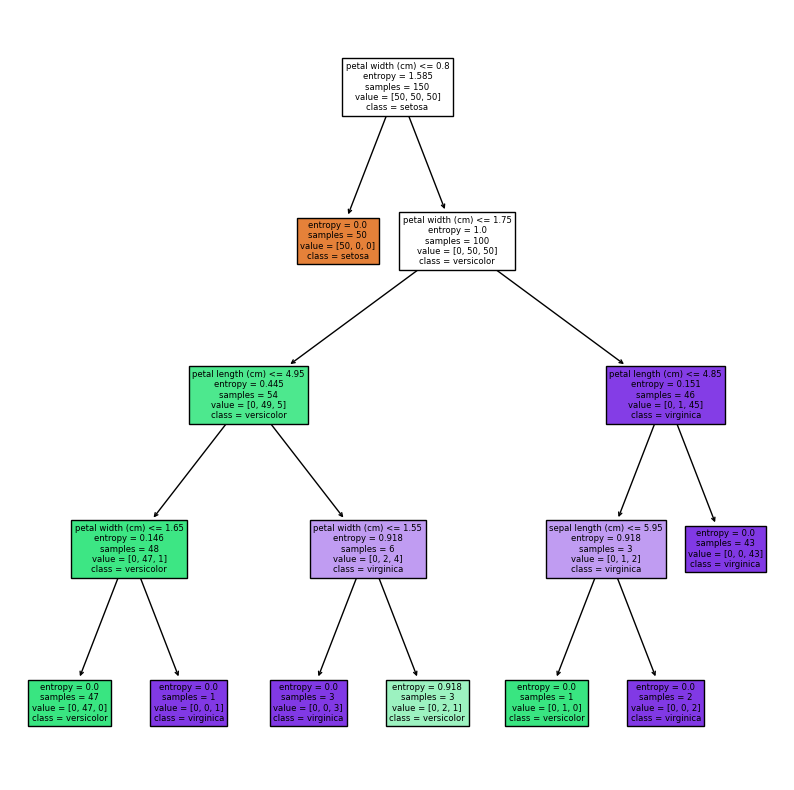

In [22]:
from sklearn import tree

fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(clf_tree,
                   feature_names=data.feature_names,
                   class_names=data.target_names,
                   filled=True)

# 6. Загрузите встроенные данные sklearn.datasets.california_housing, взяв только столбец AveBedrms в качестве единственного признака. Изобразите данные на диаграмме рассеяния так, чтобы на одной оси были отмечены значения признака, а на другой - целевой переменной.

(0.0, 10.0)

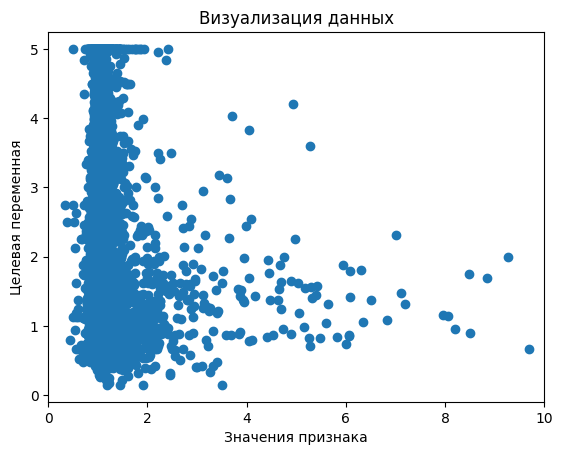

In [13]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

x = housing.data[:,3:4]
y = housing.target
sorted_features = np.argsort(x, axis=0).flatten()
x_sorted = x[sorted_features]
y_sorted = y[sorted_features]

plt.scatter(x_sorted, y_sorted)
plt.title('Визуализация данных')
plt.xlabel('Значения признака')
plt.ylabel('Целевая переменная')
plt.xlim(0, 10)

# 7. Обучите модель регрессионного дерева принятия решений sklearn.tree.DecisionTreeRegressor, зафиксировав random_state=0, а остальными гиперпараметрами по умолчению.

In [14]:
from sklearn.tree import DecisionTreeRegressor

regr_tree = DecisionTreeRegressor(random_state=0)
regr_tree.fit(x,y)

DecisionTreeRegressor(random_state=0)

# 8. Визуализируйте соответствующий граф дерева решений и получившуюся кусочную линию регрессии.

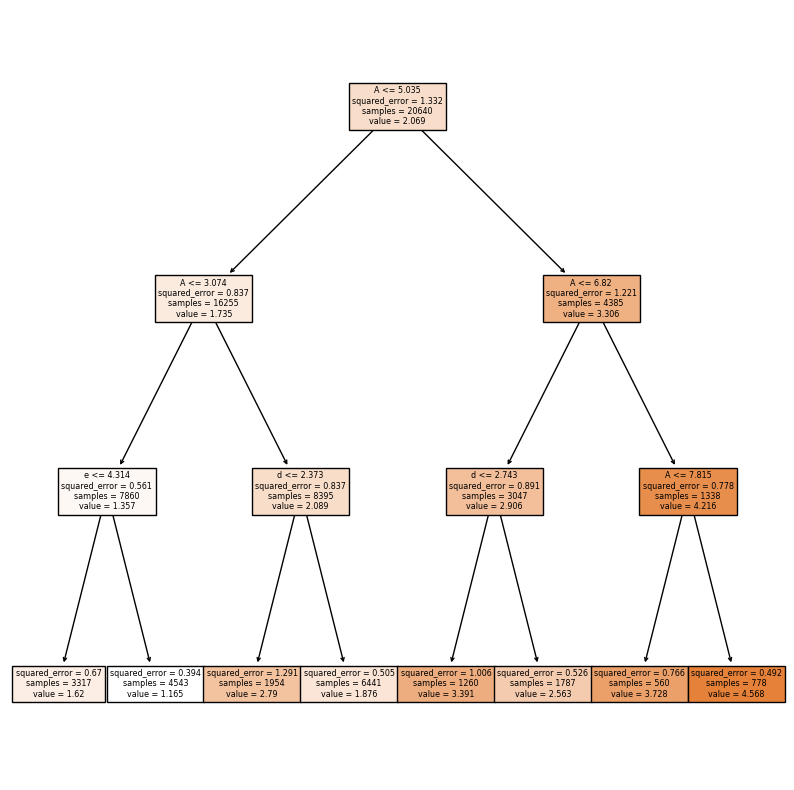

In [20]:
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(regr_tree,
                   feature_names=housing.feature_names[3],
                   class_names=housing.target_names,
                   filled=True)

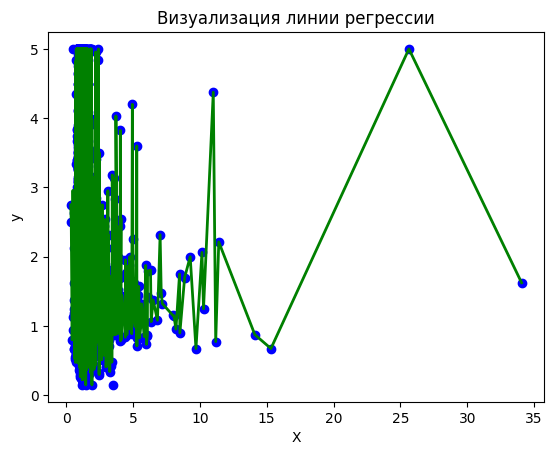

In [17]:
sorted_features = np.argsort(x, axis=0).flatten()
x_sorted = x[sorted_features]
y_sorted = y[sorted_features]



plt.scatter(x_sorted, y_sorted, c="b")

plt.plot(x_sorted, regr_tree.predict(x_sorted), "g", lw=2)

plt.title('Визуализация линии регрессии')
plt.xlabel('X')
plt.ylabel('y');


# 9. Оцените качество работы модели. Создайте новое наблюдение и сделайте предсказание на нём.

In [18]:
print('r2= ', r2_score(y, regr_tree.predict(x)))
print('MSE= ', mean_squared_error(y, regr_tree.predict(x)))

r2=  0.679172913720798
MSE=  0.4271974030094434


10. Загрузите весь датасет fetch_california_housing. Обучите ту же модель. Визуализируйте соответствующий граф дерева решений и оцените качество работы модели.

r2=  0.5341034720373743
MSE=  0.6203646616157066


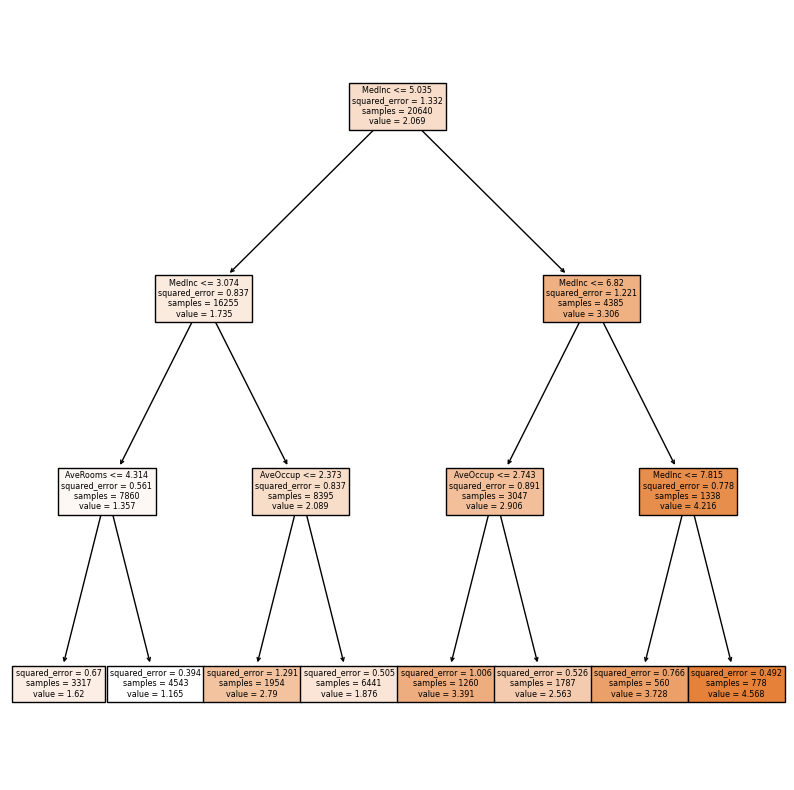

In [19]:
housing = fetch_california_housing()

x = housing.data
y = housing.target

regr_tree = DecisionTreeRegressor(max_depth=3,random_state=0)
regr_tree.fit(x,y)

fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(regr_tree,
                   feature_names=housing.feature_names,
                   class_names=housing.target_names,
                   filled=True)

print('r2= ', r2_score(y, regr_tree.predict(x)))
print('MSE= ', mean_squared_error(y, regr_tree.predict(x)))